# Final Project Submission


* Student name:Rahma Mohamed
* Student pace: part time
* Scheduled project review date/time: 16/4/2023
* Instructor name: Everlyn Asiko
* Blog post URL:

### Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### This analysis will focus on how to get the most revenue from the movies made

## 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as db
import seaborn as sns
%matplotlib inline

## 2)Reading Datasets

1) SQL

In [2]:
conn = db.connect("zippedData/im.db")
cursor=conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
my_tables= cursor.fetchall()
my_tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [3]:
imdb_data = pd.read_sql("""SELECT * FROM movie_basics  JOIN movie_ratings USING(movie_id);""", conn)

2) The Numbers

In [4]:
tn_data = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)

3) BOX Office mojo

In [5]:
bom_data= pd.read_csv("zippedData/bom.movie_gross.csv.gz", index_col=0)

# 3) Cleaning Datasets

### Box office mojo

In [6]:
bom_data.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom_data.columns

Index(['studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [8]:
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


Foreign gross has missing values, let's check them

In [9]:
bom_data[bom_data["foreign_gross"].isna()]

,studio,domestic_gross,foreign_gross,year
title,,,,
Flipped,WB,1800000.0,NaN,2010
The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
Tiny Furniture,IFC,392000.0,NaN,2010
Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [10]:
# percentage of missing values in columns
bom_data.isna().sum()/len(bom_data)

studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

foreign gross has 39% missing values, we can drop it

In [11]:
bom_data.drop(columns=["foreign_gross"], inplace=True)

In [12]:
bom_data.dropna(inplace=True)

In [13]:
bom_data

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...
The Quake,Magn.,6200.0,2018
Edward II (2018 re-release),FM,4800.0,2018
El Pacto,Sony,2500.0,2018


### IMDB

In [14]:
imdb_data.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
imdb_data.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [16]:
imdb_data.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [17]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [18]:
imdb_data.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


The dataset contains movies since 2010 to 2019

Average runtime is 94.654040 minutes...some outliers: 3 minutes minimum and 51,420 minutes maximum

average ratings are 6.332729 and ratings go from 1 to 10

In [19]:
imdb_data.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

There are missing Values in Runtime_minutes and Genres

In [20]:
mean_ratings= imdb_data.groupby("genres")["averagerating"].mean().sort_values()
mean_ratings

genres
Comedy,Musical,Sport          1.4
Adult,Horror                  2.0
History,Sci-Fi,Thriller       2.3
Adventure,Crime,Romance       2.3
Crime,Music                   2.4
                             ... 
Music,Mystery                 9.0
Game-Show                     9.0
History,Sport                 9.2
Documentary,Family,Musical    9.3
Comedy,Documentary,Fantasy    9.4
Name: averagerating, Length: 923, dtype: float64

Highhest mean ratings are for Comedy, drama, Fantasy, lowest mean is for COmedy, Musical, Sport

In [21]:
dups= imdb_data.duplicated().any().sum()
dups

0

No duplicates to drop

Dealing with missing data

In [22]:
imdb_data.isna().sum()/len(imdb_data)

movie_id           0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.103174
genres             0.010886
averagerating      0.000000
numvotes           0.000000
dtype: float64

In [23]:
imdb_data["genres"].fillna("unknown", inplace=True)

In [24]:
imdb_data.dropna(inplace=True)

We have chosen to replace genres since it is categorical, and the data may still be useful, however
we have dropped the rows that miss the runtime minutes, as we cannot assume a mean for its runtime...as this could skew our data

In [25]:
imdb_data.rename(columns={'primary_title': 'title'}, inplace=True)

In [26]:
imdb_data.rename(columns={'start_year': 'year'}, inplace=True)

In [27]:
imdb_data.drop(columns=["movie_id","original_title"], inplace=True)

Movie Id and Original title are not needed, the movie name is renamed to movie, and start year is renamed to Year

In [43]:
imdb_data

,title,year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,Swarm Season,2019,86.0,Documentary,6.2,5
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


### The Numbers

In [29]:
tn_data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


This dataset has no missing values,but the Dtypes do not match what is expected ie Release date, budgets and gross are not in the correct format, so we will change them to the correct one

We strip the dollar signs and the commas first

In [31]:
#use string method to replace dollar and comma with nothing
tn_data['domestic_gross'] = tn_data['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn_data['production_budget'] = tn_data['production_budget'].str.replace('$', '').str.replace(',', '')
tn_data['worldwide_gross'] = tn_data['worldwide_gross'].str.replace('$', '').str.replace(',', '')


we then change the type of data for the columns

In [32]:
tn_data["domestic_gross"]=pd.to_numeric(tn_data["domestic_gross"])
tn_data["production_budget"]=pd.to_numeric(tn_data["production_budget"])
tn_data["worldwide_gross"]=pd.to_numeric(tn_data["worldwide_gross"])
tn_data['release_date'] = pd.to_datetime(tn_data['release_date'])

tn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [33]:
tn_data['year'] = tn_data['release_date'].dt.year

Extracting year from release date, in case we need to group

In [34]:
tn_data

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0,2018
79,1999-04-02,Following,6000,48482,240495,1999
80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005


In [35]:
gross_ww = tn_data.groupby("year")["worldwide_gross"].mean()

In [36]:
gross_ww

year
1915    1.100000e+07
1916    4.000000e+06
1920    3.000000e+06
1925    1.550000e+07
1927    0.000000e+00
            ...     
2016    1.313614e+08
2017    1.692240e+08
2018    1.824786e+08
2019    9.965411e+07
2020    0.000000e+00
Name: worldwide_gross, Length: 96, dtype: float64

2020 has no gross, lets see whether it had movies

In [37]:
tn_data.loc[tn_data["year"]==2020]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
95,2020-12-31,Moonfall,150000000,0,0,2020
36,2020-02-21,Call of the Wild,82000000,0,0,2020
6,2020-12-31,Hannibal the Conqueror,50000000,0,0,2020


Checking whether this is the only occurrence

In [38]:
tn_data.loc[tn_data["worldwide_gross"]==0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
95,2020-12-31,Moonfall,150000000,0,0,2020
80,2017-12-13,Bright,90000000,0,0,2017
81,2019-12-31,Army of the Dead,90000000,0,0,2019
36,2020-02-21,Call of the Wild,82000000,0,0,2020
71,2019-08-30,PLAYMOBIL,75000000,0,0,2019
...,...,...,...,...,...,...
62,2014-12-31,Stories of Our Lives,15000,0,0,2014
65,2007-12-31,Tin Can Man,12000,0,0,2007
72,2015-05-19,Family Motocross,10000,0,0,2015


This wont do, we need those worlwide and domestic grosses

In [39]:
tn_data = tn_data[tn_data['worldwide_gross'] != 0]

In [40]:
tn_data.loc[tn_data["worldwide_gross"]==0]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,


We drop all those 367 records

In [44]:
tn_data.rename(columns={'movie': 'title'}, inplace=True)

C:\Users\Steve\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [45]:
tn_data

,release_date,title,production_budget,domestic_gross,worldwide_gross,year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
76,2006-05-26,Cavite,7000,70071,71644,2006
77,2004-12-31,The Mongol King,7000,900,900,2004
79,1999-04-02,Following,6000,48482,240495,1999


The data is now cleaner

# 4) Merging the Datasets

In [49]:
merged_data = imdb_data.merge(bom_data, on=['title', 'year']).merge(tn_data, on=['title', 'year'])

In [50]:
merged_data

,title,year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,release_date,production_budget,domestic_gross_y,worldwide_gross
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013-12-25,91000000,58236838,187861183
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,2014-09-19,28000000,26017685,62108587
2,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,2015-06-12,215000000,652270625,1648854864
3,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,2011-10-28,45000000,13109815,21544732
4,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,2012-04-13,30000000,44338224,54052249
...,...,...,...,...,...,...,...,...,...,...,...,...
1034,"Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,Affirm,17600000.0,2018-03-23,5000000,17547999,25529498
1035,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Par.,67400000.0,2018-11-16,48000000,67363237,119736188
1036,The Great Wall,2017,72.0,Documentary,6.5,24,Uni.,45500000.0,2017-02-17,150000000,45157105,334486852
1037,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,2018-06-08,10000000,44069456,70133905


In [53]:
merged_data.columns

Index(['title', 'year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'studio', 'domestic_gross_x', 'release_date',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1038
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1039 non-null   object        
 1   year               1039 non-null   int64         
 2   runtime_minutes    1039 non-null   float64       
 3   genres             1039 non-null   object        
 4   averagerating      1039 non-null   float64       
 5   numvotes           1039 non-null   int64         
 6   studio             1039 non-null   object        
 7   domestic_gross_x   1039 non-null   float64       
 8   release_date       1039 non-null   datetime64[ns]
 9   production_budget  1039 non-null   int64         
 10  domestic_gross_y   1039 non-null   int64         
 11  worldwide_gross    1039 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 105.5+ KB


# 7) Visualizing the data

In [68]:
corrs = merged_df.corr()
corrs["averagerating"].sort_index()

averagerating        1.000000
domestic_gross_x     0.292718
domestic_gross_y     0.292750
numvotes             0.517907
production_budget    0.168339
runtime_minutes      0.406148
worldwide_gross      0.278457
year                 0.024619
Name: averagerating, dtype: float64

In [69]:
corrs

,year,runtime_minutes,averagerating,numvotes,domestic_gross_x,production_budget,domestic_gross_y,worldwide_gross
year,1.000000,0.117873,0.024619,-0.092889,0.104557,0.053264,0.104553,0.116616
runtime_minutes,0.117873,1.000000,0.406148,0.413304,0.276495,0.337804,0.276426,0.297700
averagerating,0.024619,0.406148,1.000000,0.517907,0.292718,0.168339,0.292750,0.278457
numvotes,-0.092889,0.413304,0.517907,1.000000,0.637405,0.514512,0.637399,0.621866
domestic_gross_x,0.104557,0.276495,0.292718,0.637405,1.000000,0.694491,0.999997,0.937926
production_budget,0.053264,0.337804,0.168339,0.514512,0.694491,1.000000,0.694416,0.778029
domestic_gross_y,0.104553,0.276426,0.292750,0.637399,0.999997,0.694416,1.000000,0.937880
worldwide_gross,0.116616,0.297700,0.278457,0.621866,0.937926,0.778029,0.937880,1.000000


Strongest correlations are: production budget and worldwide gross, runtime and rating have a weaker correlation 

In [70]:
corrs["production_budget"].sort_index()

averagerating        0.168339
domestic_gross_x     0.694491
domestic_gross_y     0.694416
numvotes             0.514512
production_budget    1.000000
runtime_minutes      0.337804
worldwide_gross      0.778029
year                 0.053264
Name: production_budget, dtype: float64

### Rating vs Runtime

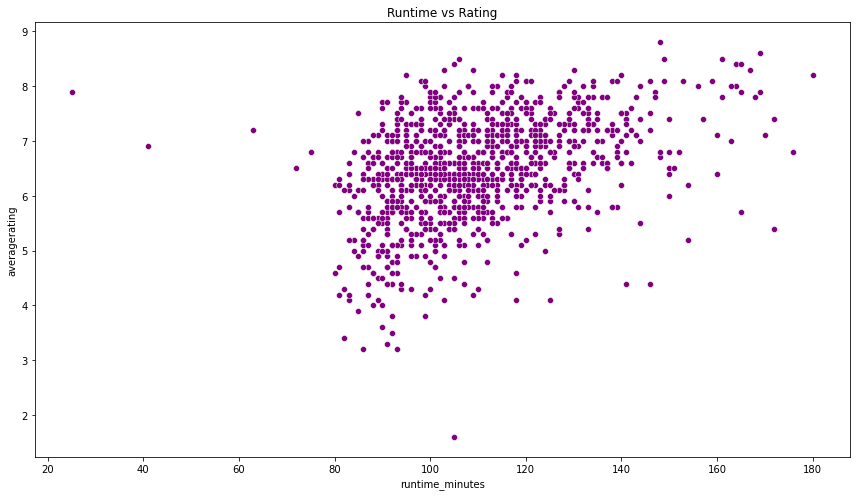

In [78]:
# # Set plot size
plt.figure(figsize=(12, 7))

# Plot the first graph
plt.subplot()
sns.scatterplot(x='runtime_minutes', y='averagerating', data=merged_data, color="purple")
plt.title('Runtime vs Rating')
plt.ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()

Runtime that is normal is 80 minutes to 140 minutes, and ratings are in the 6-8 range

## Production Budget vs worldwide gross

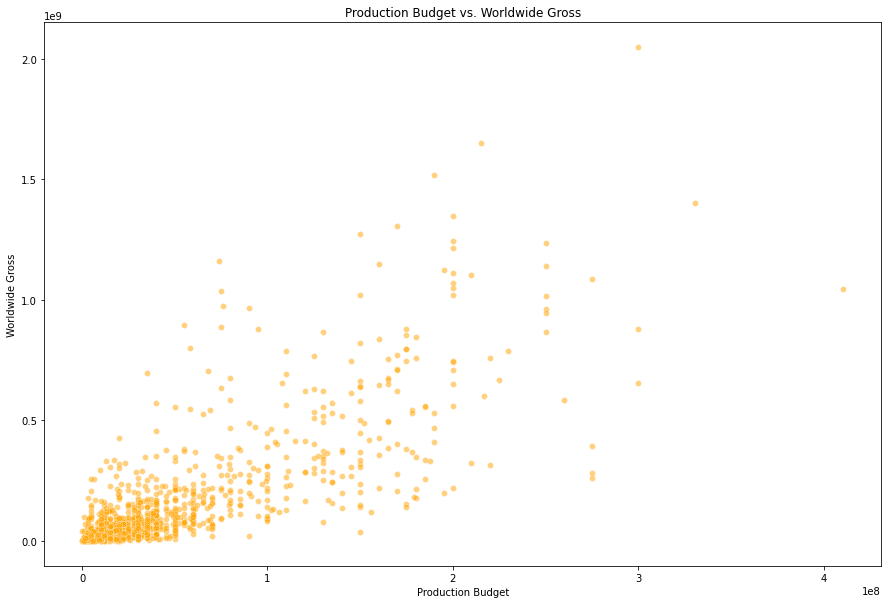

In [79]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=merged_df, alpha=0.5, color="orange")
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()


The more budget increases, the more gross earnings worldwide

### Check the Genres that are popular in rating

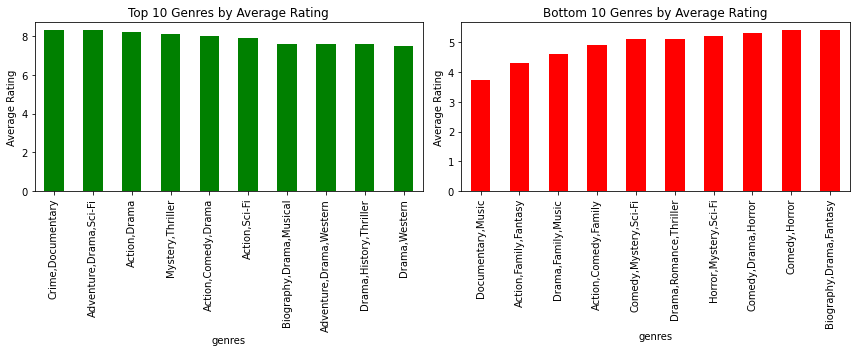

In [90]:
# Grouping by genre and calculate mean rating
genre_ratings = merged_data.groupby('genres')['averagerating'].mean()

# Sorting by rating and get top/bottom 10 genres
top_genres = genre_ratings.sort_values(ascending=False)[:10]
bottom_genres = genre_ratings.sort_values()[:10]

#bar plot
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax1, ax2 = axes

top_genres.plot(kind='bar', ax=ax1, color="green")
ax1.set_title('Top 10 Genres by Average Rating')
ax1.set_ylabel('Average Rating')

bottom_genres.plot(kind='bar', ax=ax2, color="red")
ax2.set_title('Bottom 10 Genres by Average Rating')
ax2.set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


In [89]:
top_genres

genres
Crime,Documentary          8.3
Adventure,Drama,Sci-Fi     8.3
Action,Drama               8.2
Mystery,Thriller           8.1
Action,Comedy,Drama        8.0
Action,Sci-Fi              7.9
Biography,Drama,Musical    7.6
Adventure,Drama,Western    7.6
Drama,History,Thriller     7.6
Drama,Western              7.5
Name: averagerating, dtype: float64

## Conclusion and Recommendations


### Budget for best returns

100 million should be the goal if we want a good return, however, smaller projects can be done if they are able to hit the 7-8 rating, even though it has a weak positive correlation with both domestic and worldwide gross, 

### Genres to invest into for best ratings

Crime,Documentary          
Adventure,Drama,Sci-Fi     
Action,Drama               
Mystery,Thriller           
Action,Comedy,Drama        
Action,Sci-Fi              
Biography,Drama,Musical    
Adventure,Drama,Western    
Drama,History,Thriller     
Drama,Western              

### Runtime
-Rating has a strong positive correlation with the runtime of the movie, the dirstibution is clustered within a value range of 80 to 140 minutes, hence a runtime of that range will suffice for normal movies.

Documentaries may be longer though